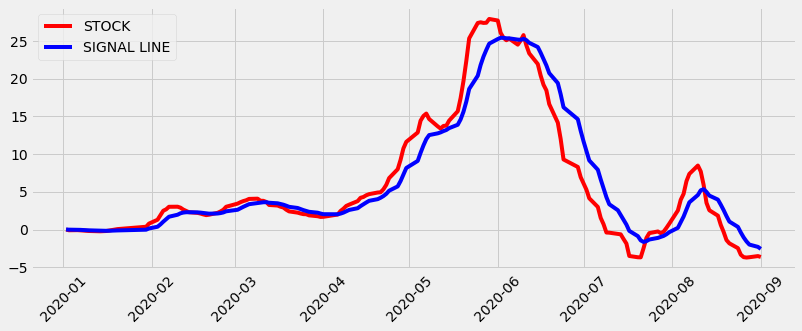

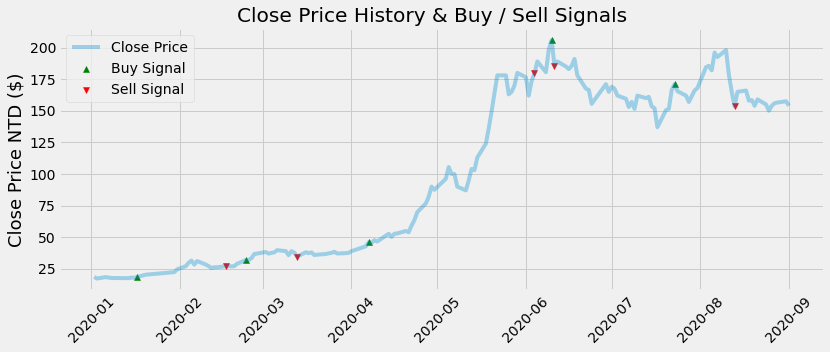

Total Cost： 473.4 NTD
Total Earn： 580.25 NTD
Net Value： 106.85 NTD
Rate Of Return： 22.57 %


In [22]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('1325.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

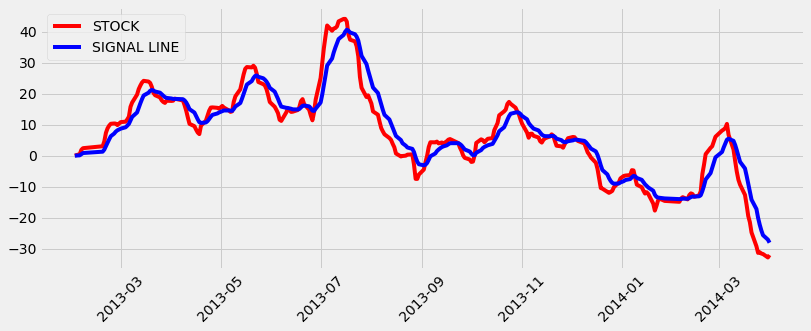

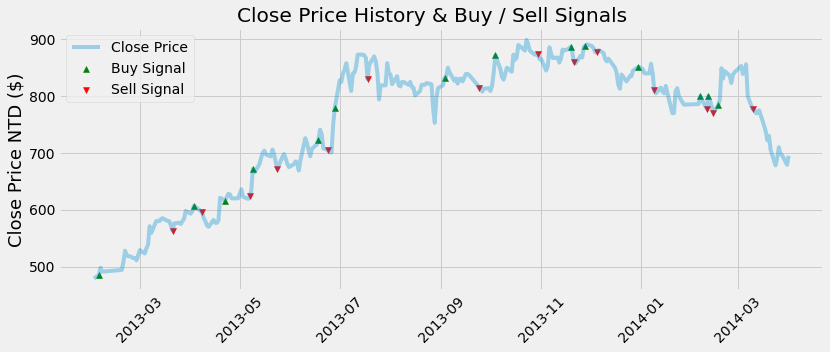

Total Cost： 10597.0 NTD
Total Earn： 10553.0 NTD
Net Value： -44.0 NTD
Rate Of Return： -0.42 %


In [23]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('1565.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

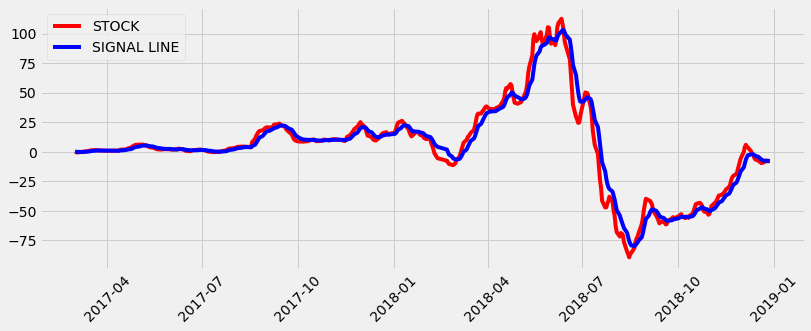

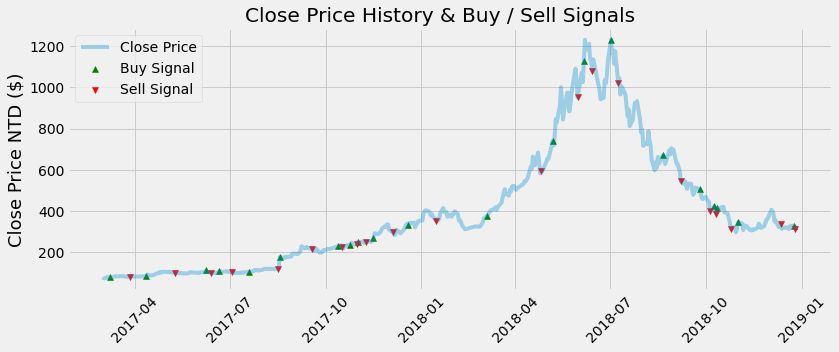

Total Cost： 8164.5 NTD
Total Earn： 8041.4 NTD
Net Value： -123.1 NTD
Rate Of Return： -1.51 %


In [24]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('2327.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

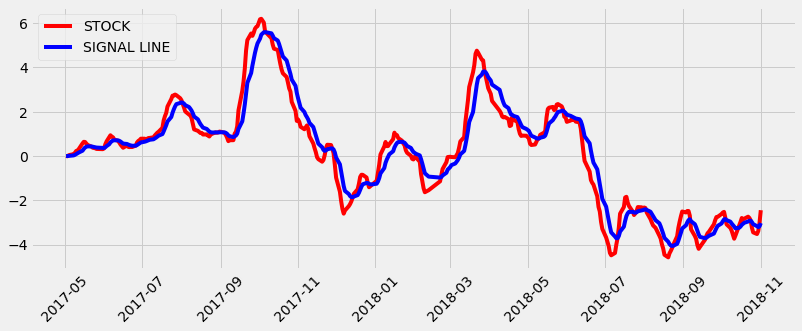

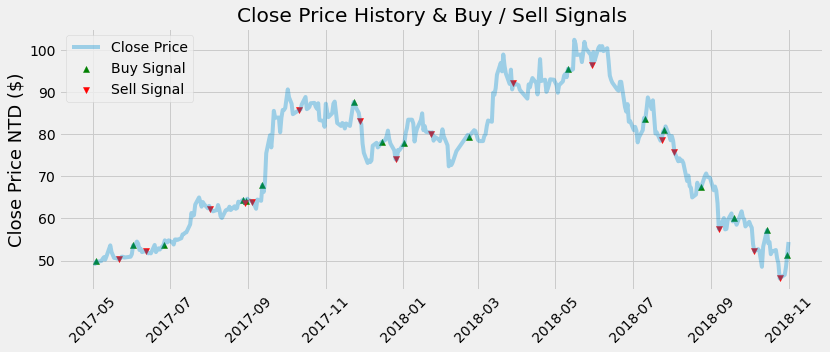

Total Cost： 1173.2 NTD
Total Earn： 2018-11-01    1168.95
Name: Close, dtype: float64 NTD
Net Value： 2018-11-01   -4.25
Name: Close, dtype: float64 NTD
Rate Of Return： 2018-11-01   -0.36
Name: Close, dtype: float64 %


In [25]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('2408.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

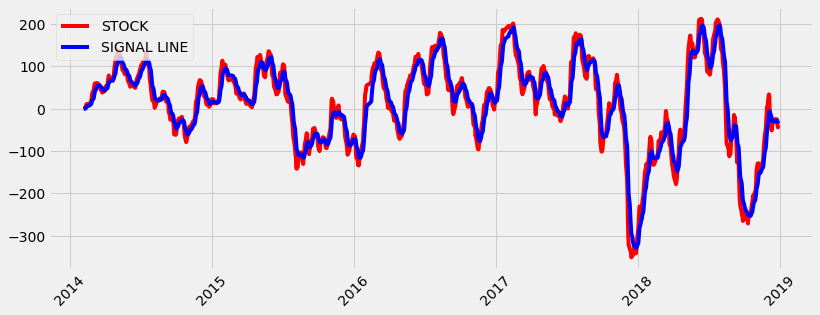

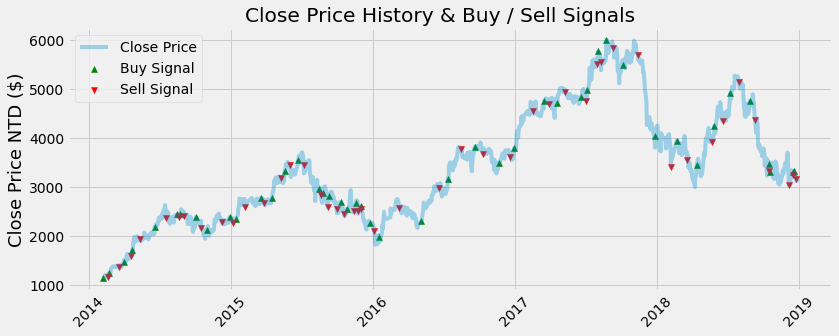

Total Cost： 149815.0 NTD
Total Earn： 151185.0 NTD
Net Value： 1370.0 NTD
Rate Of Return： 0.91 %


In [26]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('3008.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

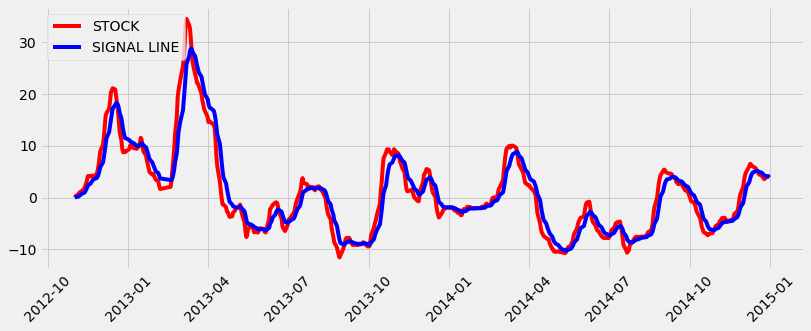

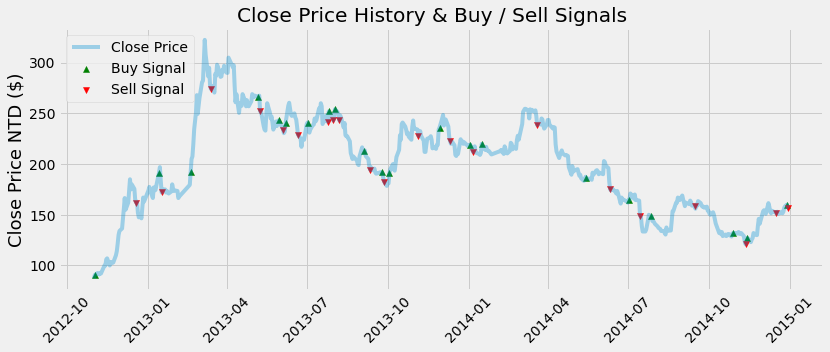

Total Cost： 4161.1 NTD
Total Earn： 4241.5 NTD
Net Value： 80.4 NTD
Rate Of Return： 1.93 %


In [27]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('3131.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

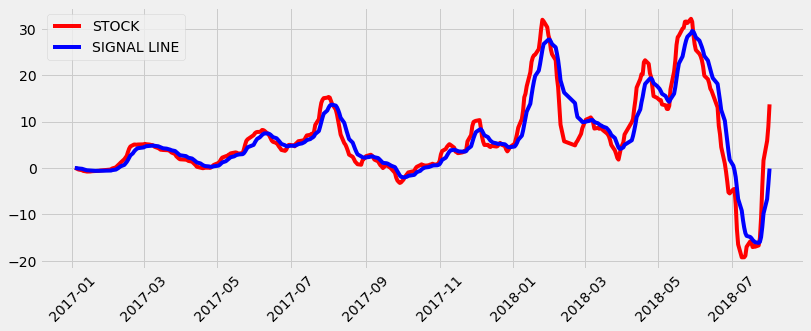

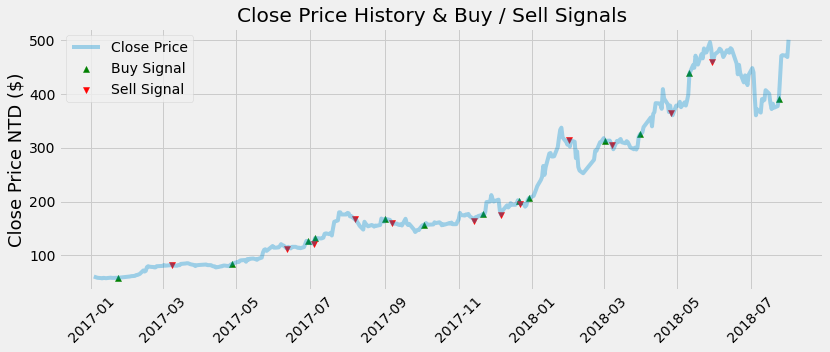

Total Cost： 2775.6 NTD
Total Earn： 2018-08-01    3121.4
Name: Close, dtype: float64 NTD
Net Value： 2018-08-01    345.8
Name: Close, dtype: float64 NTD
Rate Of Return： 2018-08-01    12.46
Name: Close, dtype: float64 %


In [28]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('3563.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

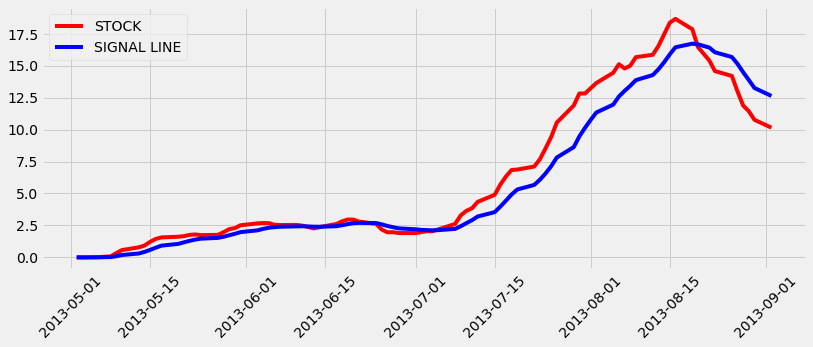

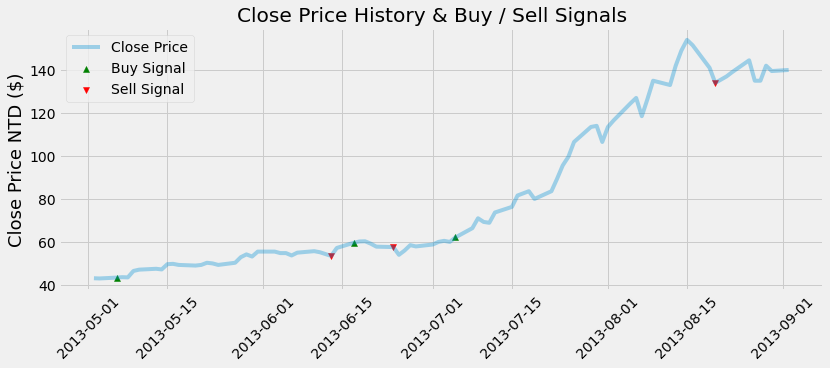

Total Cost： 165.1 NTD
Total Earn： 245.1 NTD
Net Value： 80.0 NTD
Rate Of Return： 48.46 %


In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('3665.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

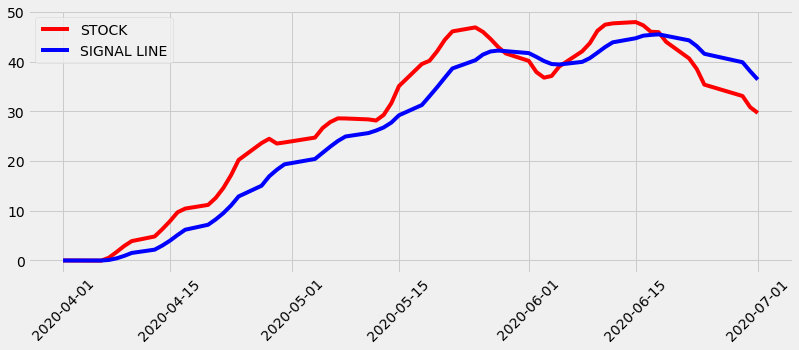

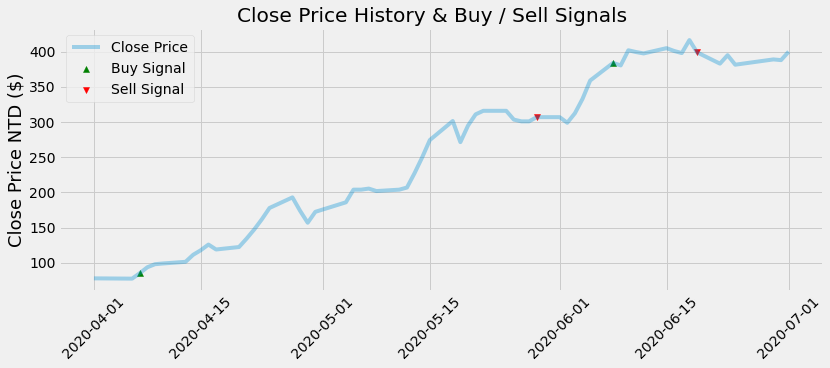

Total Cost： 469.3 NTD
Total Earn： 706.0 NTD
Net Value： 236.7 NTD
Rate Of Return： 50.44 %


In [30]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('4171.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

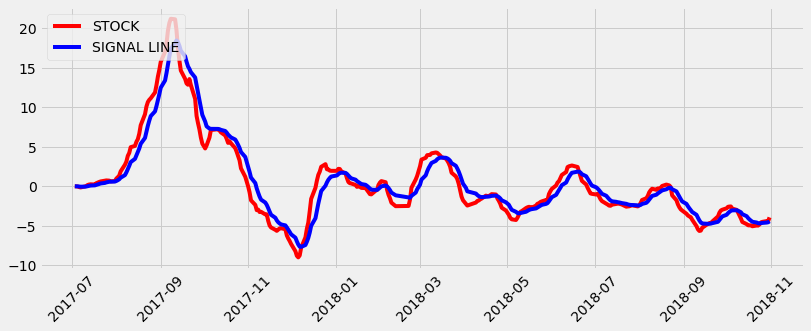

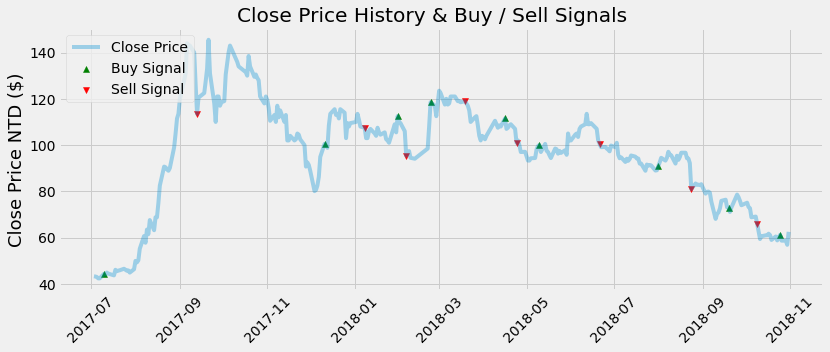

Total Cost： 812.5500000000001 NTD
Total Earn： 2018-10-31    846.4
Name: Close, dtype: float64 NTD
Net Value： 2018-10-31    33.85
Name: Close, dtype: float64 NTD
Rate Of Return： 2018-10-31    4.17
Name: Close, dtype: float64 %


In [31]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('4721.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

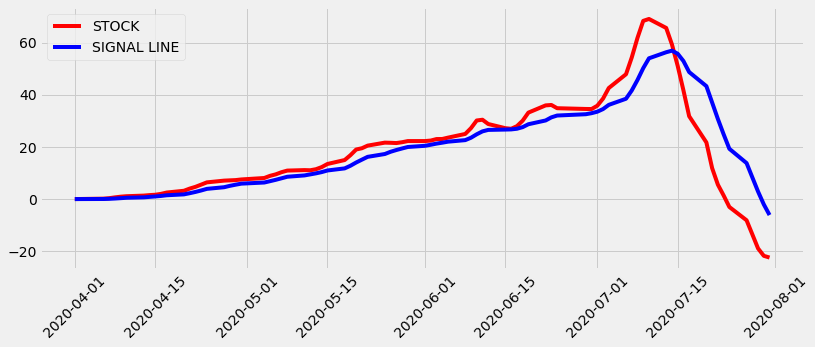

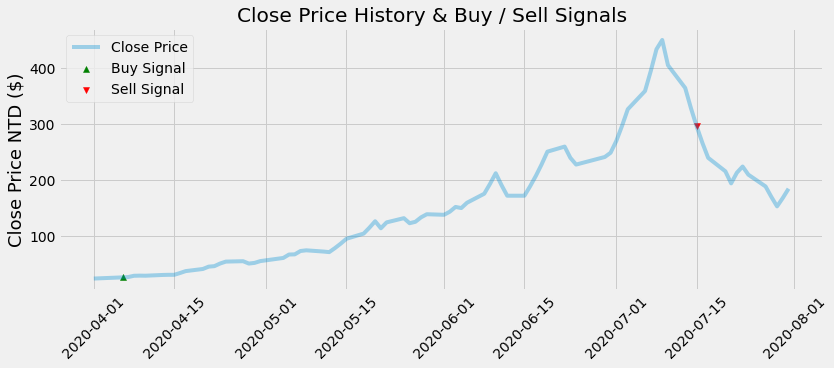

Total Cost： 27.0 NTD
Total Earn： 296.0 NTD
Net Value： 269.0 NTD
Rate Of Return： 996.3 %


In [32]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('4743.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

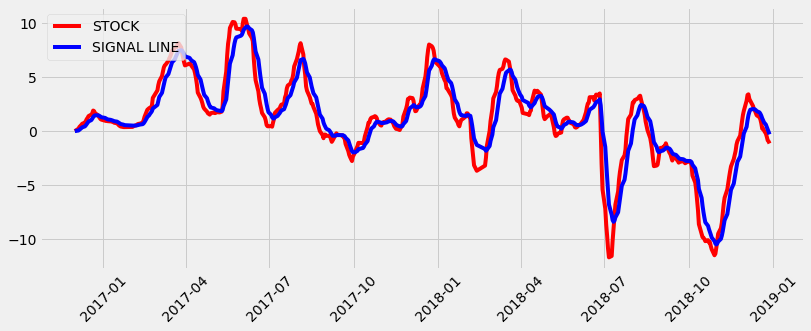

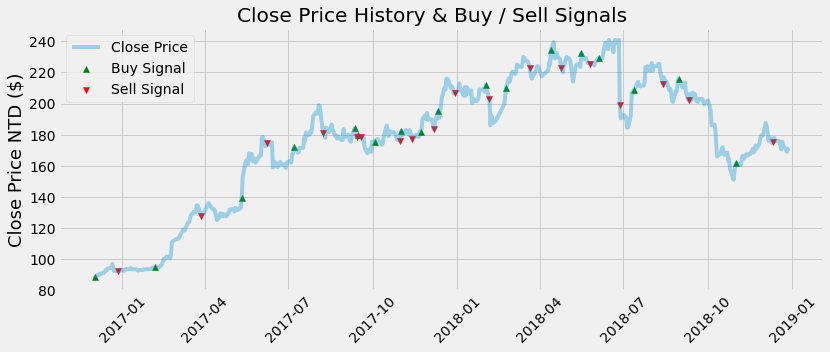

Total Cost： 3297.3 NTD
Total Earn： 3340.5 NTD
Net Value： 43.2 NTD
Rate Of Return： 1.31 %


In [33]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('5536.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

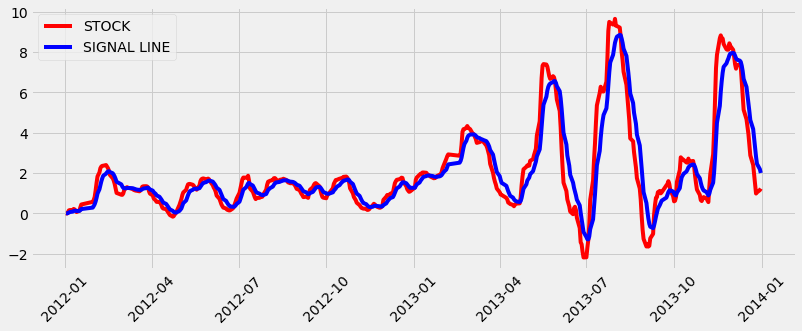

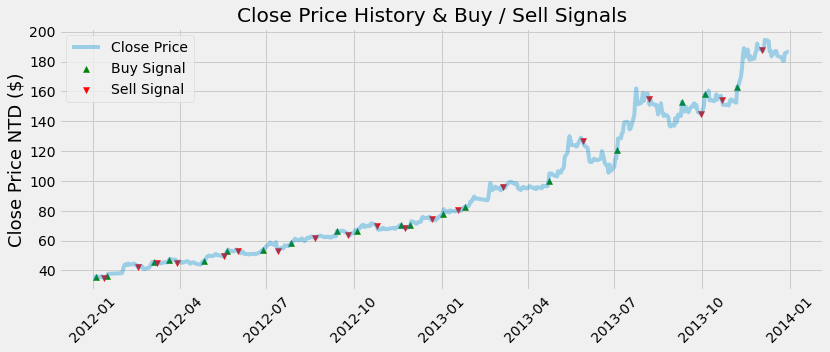

Total Cost： 1505.75 NTD
Total Earn： 1605.9 NTD
Net Value： 100.15 NTD
Rate Of Return： 6.65 %


In [34]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('5904.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

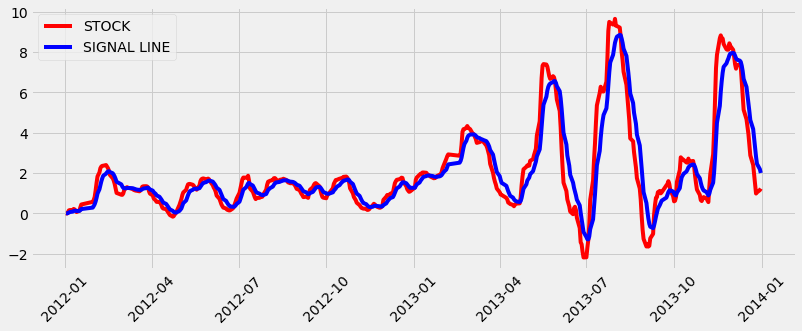

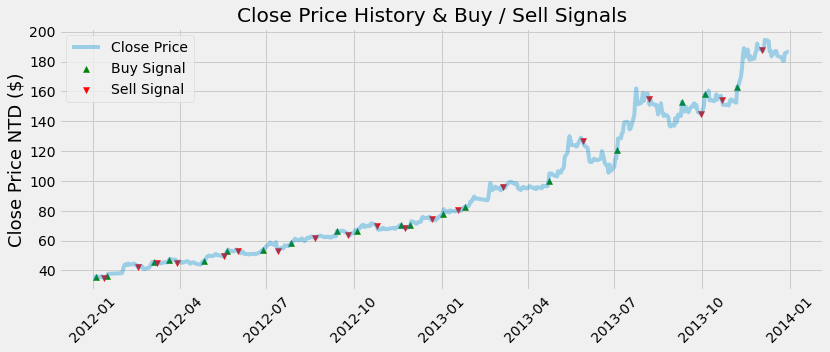

Total Cost： 1505.75 NTD
Total Earn： 1605.9 NTD
Net Value： 100.15 NTD
Rate Of Return： 6.65 %


In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('5904.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

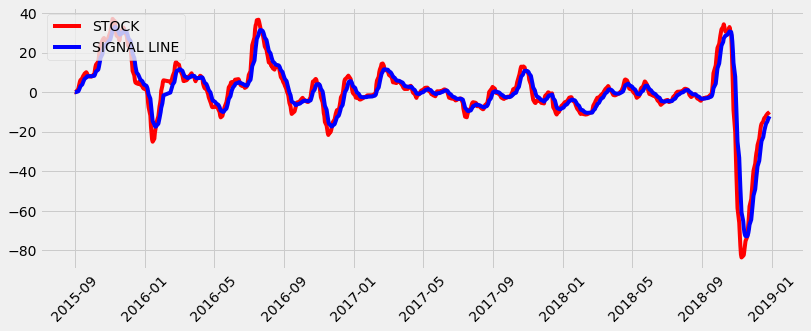

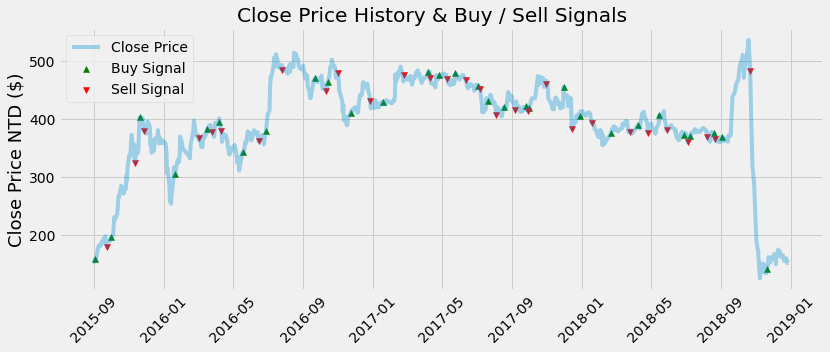

Total Cost： 11592.5 NTD
Total Earn： 2018-12-28    11895.0
Name: Close, dtype: float64 NTD
Net Value： 2018-12-28    302.5
Name: Close, dtype: float64 NTD
Rate Of Return： 2018-12-28    2.61
Name: Close, dtype: float64 %


In [36]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('6452.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")

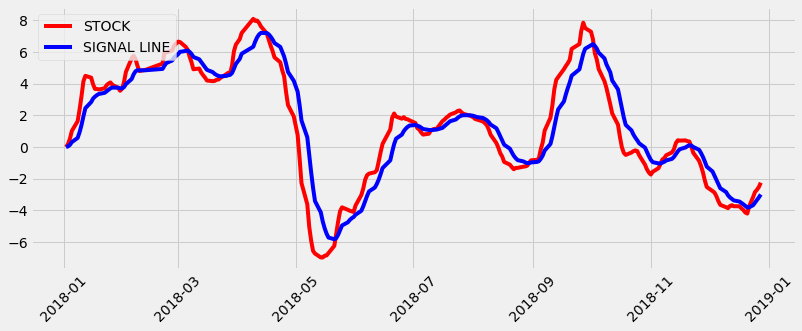

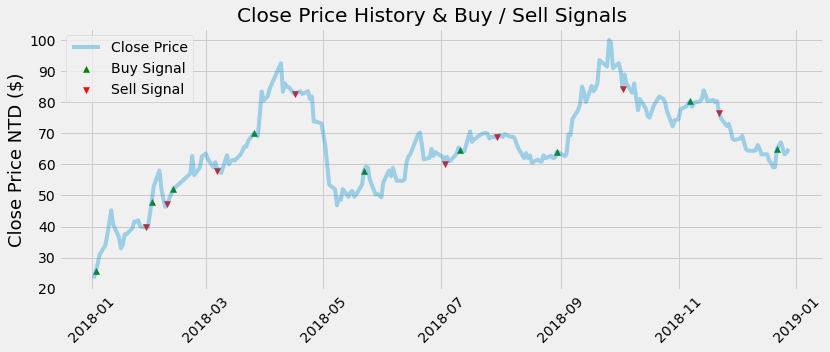

Total Cost： 527.5999999999999 NTD
Total Earn： 2018-12-28    582.1
Name: Close, dtype: float64 NTD
Net Value： 2018-12-28    54.5
Name: Close, dtype: float64 NTD
Rate Of Return： 2018-12-28    10.33
Name: Close, dtype: float64 %


In [37]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import talib
plt.style.use('fivethirtyeight')

df = pd.read_csv('9958.csv')

df = df.set_index(pd.DatetimeIndex(df['Date'].values))

ShortEMA = df.Close.ewm(span=12, adjust=False).mean() # Fast Moving Average

LongEMA = df.Close.ewm(span=26, adjust=False).mean() # Slow Moving Average

MACD = ShortEMA - LongEMA

signal = MACD.ewm(span=9, adjust=False).mean()

df['MACD'] = MACD
df['Signal Line'] = signal

flag = 0

def InvestStrategy(signal):
    BuyStock = []
    SellStock = []
    global flag

  # If MACD > Signal Line, Buy The Stock. If Not, Sell The Stock
    for i in range(0, len(signal)):
        if signal['MACD'][i] > signal['Signal Line'][i]:   
            if flag == 0:
                BuyStock.append(signal['Close'][i])
                SellStock.append(np.nan)
                flag = 1
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        elif signal['MACD'][i] < signal['Signal Line'][i]:      
            if flag == 1:
                SellStock.append(signal['Close'][i])
                BuyStock.append(np.nan)
                flag = 0
            else:
                BuyStock.append(np.nan)
                SellStock.append(np.nan)

        else: # Handling nan values
            BuyStock.append(np.nan)
            SellStock.append(np.nan)
  
    return (BuyStock, SellStock)

temp = InvestStrategy(df)
df['BuyStockPrice'] = temp[0]
df['SellStockPrice'] = temp[1]

TotalCost = np.sum(df['BuyStockPrice'])  
TotalEarn = np.sum(df['SellStockPrice'])     

if flag == 1:
    TotalEarn = TotalEarn + df['Close'].tail(1)

NetValue = round(TotalEarn - TotalCost, 2)
ReturnRate = round(100 * (TotalEarn - TotalCost) / TotalCost, 2)

# Visualize The Strategy
plt.figure(figsize=(12.2,4.5)) #width = 12.2in, height = 4.5
plt.plot(df.index, MACD, label='STOCK', color = 'red')
plt.plot(df.index, signal, label='SIGNAL LINE', color='blue')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.show()

title = 'Close Price History & Buy / Sell Signals   '
my_stocks = df
plt.figure(figsize=(12.2,4.5))
plt.scatter(my_stocks.index, my_stocks['BuyStockPrice'], color = 'green', label='Buy Signal', marker = '^', alpha = 1)
plt.scatter(my_stocks.index, my_stocks['SellStockPrice'], color = 'red', label='Sell Signal', marker = 'v', alpha = 1)
plt.plot(my_stocks['Close'], label='Close Price', alpha = 0.35)
plt.xticks(rotation=45)
plt.title(title)
plt.ylabel('Close Price NTD ($)',fontsize=18)
plt.legend(loc='upper left')
plt.show()

print("Total Cost：", TotalCost, "NTD")
print("Total Earn：", TotalEarn, "NTD")
print("Net Value：", NetValue, "NTD")
print("Rate Of Return：", ReturnRate, "%")